### Below used for debugging indivudal circuit runs


In [253]:
from qiskit.circuit.library import QuantumVolume, EfficientSU2, TwoLocal, QFT
from qiskit import QuantumCircuit
from qiskit.circuit.library.standard_gates import iSwapGate, CXGate
from qiskit import QuantumCircuit
from qiskit.providers.fake_provider import FakeQuitoV2
from qiskit.transpiler.coupling import CouplingMap
from qiskit.extensions import UnitaryGate
from weylchamber import canonical_gate

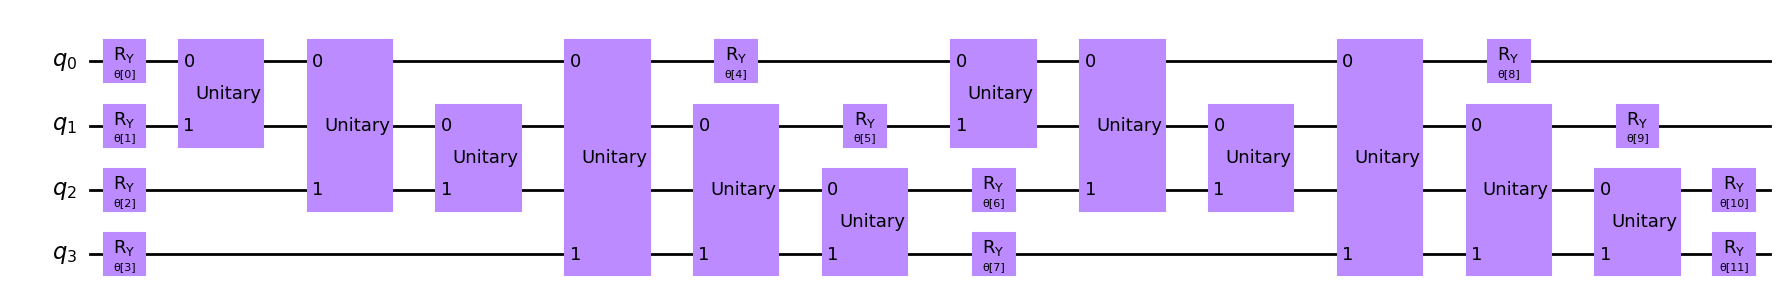

In [254]:
# 2Q Gate Costs:
# CX: {CX:1, sqiswap:2}
qc = TwoLocal(
    num_qubits=4,
    rotation_blocks="ry",
    entanglement_blocks=CXGate(),
    entanglement="full",
    reps=2,
)

# # CPHASE(pi/2): {CX:2, sqiswap:2}
# qc = TwoLocal(num_qubits=4,  rotation_blocks='ry', entanglement_blocks = CXGate().power(1/2), entanglement='full', reps=2)

# # iswap: {CX:2, sqiswap:2}
# qc = TwoLocal(num_qubits=4, rotation_blocks='ry', entanglement_blocks = iSwapGate(), entanglement='full', reps=2)

# # ECP: {CX:3, sqiswap:2}
ecp = UnitaryGate(canonical_gate(0.5, 0.25, 0.25).full())
qc = TwoLocal(
    num_qubits=4,
    rotation_blocks="ry",
    entanglement_blocks=ecp,
    entanglement="full",
    reps=2,
)

# SqiSwap: {CX:2, sqiswap:1}
# qc = TwoLocal(num_qubits=4, rotation_blocks='ry', entanglement_blocks= iSwapGate().power(1/2), entanglement='full', reps=2)

# qc = QFT(4)

# qc = QuantumCircuit(3)
# qc.ccx(0,1,2)
# qc.cx(0,1)
# qc.cx(0,2)

qc.decompose().draw("mpl", fold=-1)

In [255]:
coupling_map = FakeQuitoV2().target.build_coupling_map()
coupling_map = CouplingMap.from_line(8)
# coupling_map = CouplingMap.from_grid(2,2)
# coupling_map.draw()

10
20


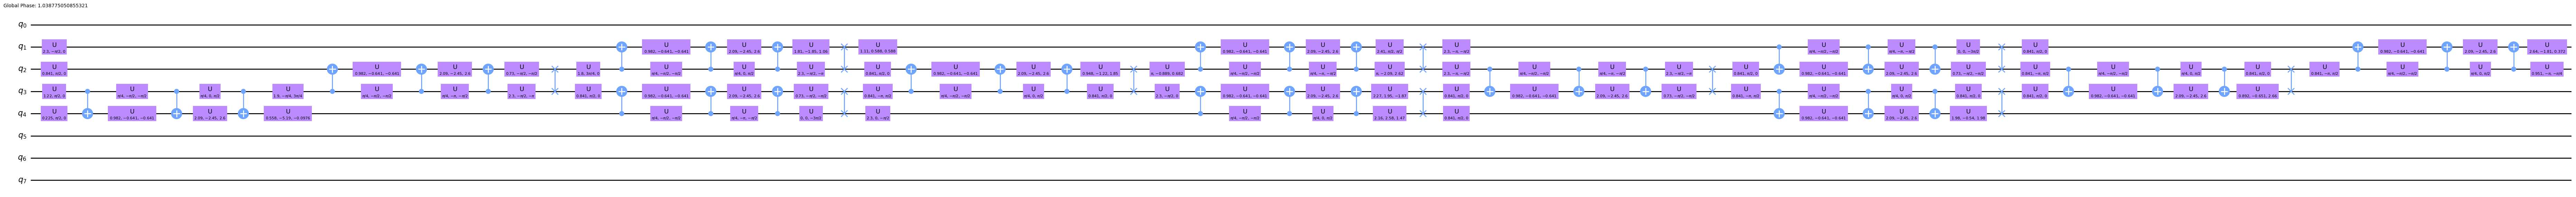

In [261]:
from virtual_swap.pass_managers import SabreVS, SabreQiskit
from transpile_benchy.metrics import DepthMetric

for _ in range(1):
    runner = SabreVS(coupling_map, cx_basis=True)
    transp = runner.run(qc)
    # mid0 = runner.pm.property_set["mid0"]
    mid = runner.pm.property_set["circuit_progress"]
    # print(DepthMetric.calculate(transp))
    print(runner.pm.property_set["accepted_subs"])
    print(runner.pm.property_set["monodromy_depth"])
display(mid.draw(output="mpl", fold=-1))  # , filename="qft_vs.svg")
# display(transp.draw(output="mpl"))

In [257]:
# runner.pm.property_set["layout"]

35


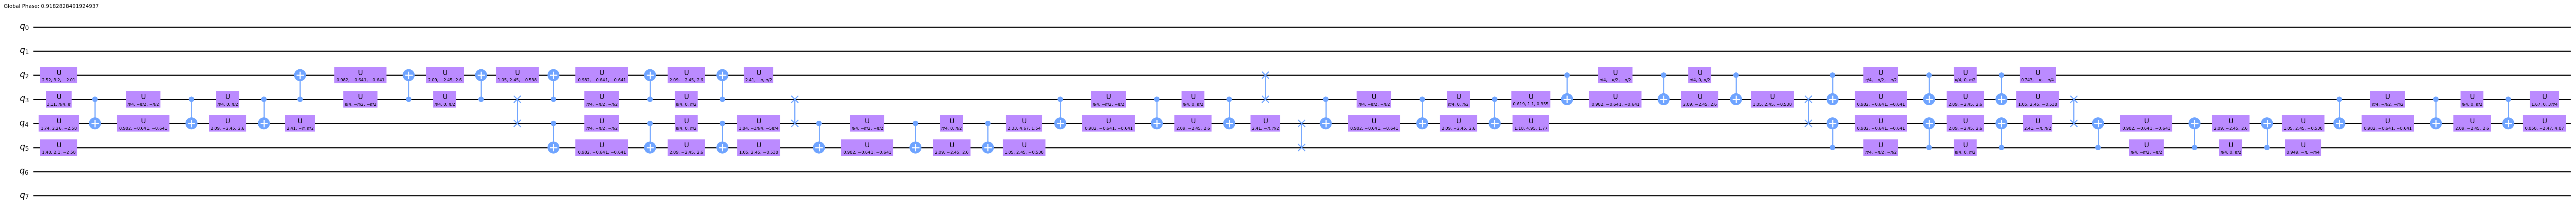

In [258]:
# set original qc to use
from qiskit import transpile

# qc2 = transpile(qc, initial_layout=runner.pm.property_set["layout"], coupling_map=coupling_map)
# qc2 = transpile(qc, coupling_map=coupling_map, optimization_level=3)
for _ in range(1):
    pm2 = SabreQiskit(coupling_map)  # , cx_basis=True)
    qc2 = pm2.run(qc)
    mid = pm2.pm.property_set["circuit_progress"]
    print(pm2.pm.property_set["monodromy_depth"])
display(mid.draw(output="mpl", fold=-1))  # , filename="qft_qiskit.svg")
# display(transp.draw(output="mpl"))

In [259]:
# from qiskit.quantum_info import Operator
# Operator(mid).equiv(qc2)